### Problem Set 7: Anomaly Detection

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### **The Dataset** 

Source: K.Kalyani,K.Kalyani. (2013). Tamilnadu Electricity Board Hourly Readings. UCI Machine Learning Repository. https://doi.org/10.24432/C5KP4K.

In [13]:
data = pd.read_csv('eb.csv')

data.head()

,ForkVA,ForkW,Type,Sector,ServiceID
0,0.865935636652813,0.143763,Bank,1.0,671004572.0
1,0.12980418301167,0.088930,Bank,1.0,671004572.0
2,0.061801486824636,0.552047,Bank,1.0,671004572.0
3,0.099116455214686,0.848172,Bank,1.0,671004572.0
4,0.20570390723589,0.624722,Bank,1.0,671004572.0


#### Remove all non-numeric data from the dataset

In [14]:
data = data.drop(['Type', 'Sector'], axis=1)

data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

In [15]:
data.describe()

,ForkVA,ForkW,ServiceID
count,45781.000000,45781.000000,4.578100e+04
mean,0.500983,0.499639,7.651484e+08
std,0.288658,0.289301,9.235777e+08
min,0.000005,0.000018,1.983468e+08
25%,0.251389,0.250063,4.570085e+08
50%,0.500820,0.500357,6.001242e+08
75%,0.750885,0.749554,7.856432e+08
max,0.999996,0.999970,5.783457e+09


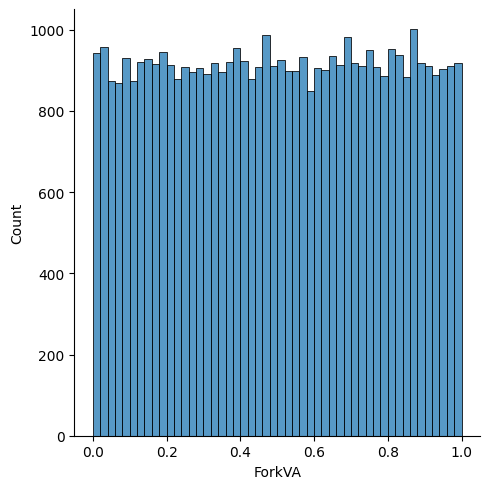

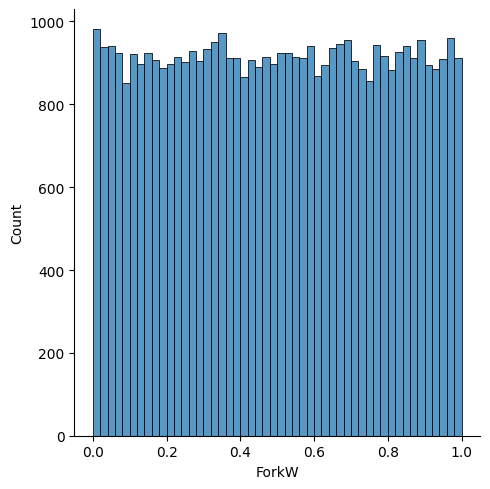

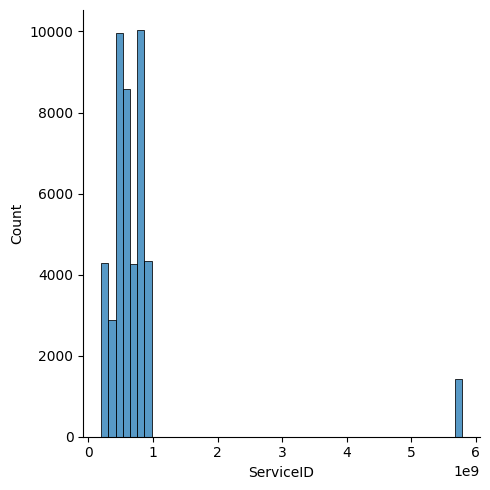

In [23]:
feature_name = data.iloc[:,:].columns
plt.figure
for i, cn in enumerate(data[feature_name]):
    sns.displot(data[cn], bins=50)
plt.show()